# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [291]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [292]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

true

In [293]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [294]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [295]:
print(N)

100.0

In [296]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [297]:
using Printf
include("./TMYangMills.jl");

In [298]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.01
the time step is 0.005


# Initial data of m β Ψ and Ψ,x

In [299]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)

#state array is m beta psi xchi,u xchi,rORx psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x


#PSI,R
A=0.075*p*(1−q)
r0=0.2
sigma=0.1

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.01
r0=0.3
sigma=0.07

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
state_array[4:L-3,5]=Der_arrayLOP(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]


aux=Der_arrayLOP(state_array,5,initX)


# update interpolation of psi,x
derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);
derrxchi_func = Spline1D(initX[4:L-3], aux[4:L-3], k=4);

funcs=[derxchi_func derpsi_func xchi_func derrxchi_func];

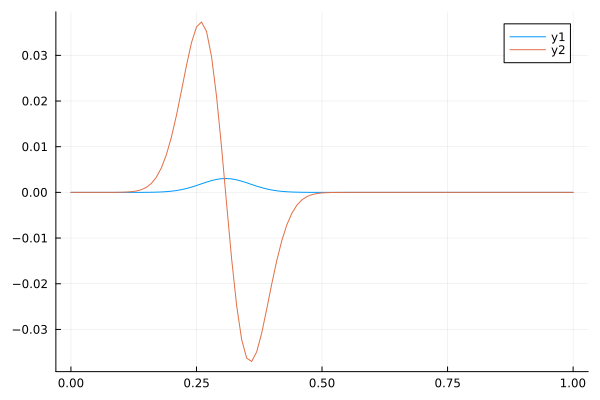

In [300]:
using Plots
plot(initX1, [state_array[4:L-3,7] state_array[4:L-3,5]])

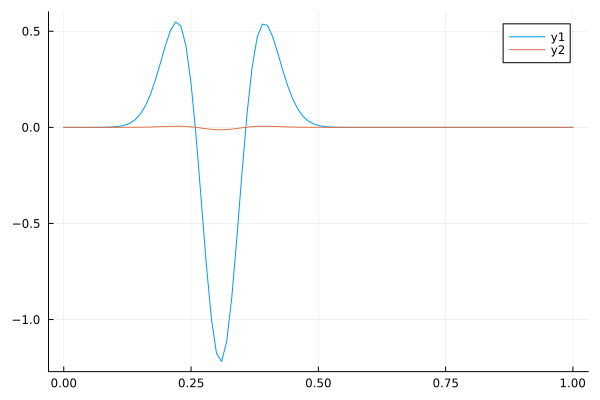

In [301]:
plot(initX[4:L-3], [Der_arrayLOP(state_array,5,initX)[4:L-3] DDer_array(state_array,7,initX)[4:L-3]])

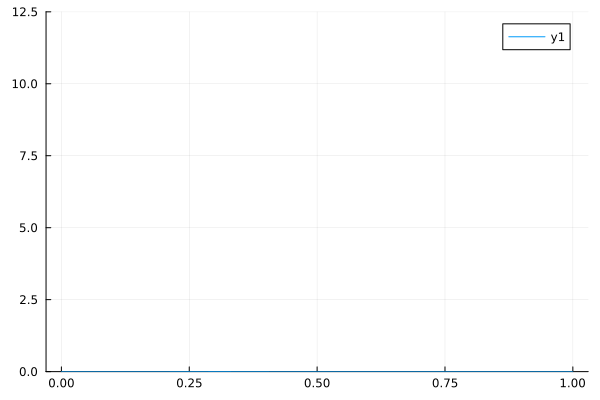

In [302]:
plot(initX1, state_array[4:L-3,7],ylim=[0,12.5])

In [303]:
y0=[0.0 0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:4] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

101×4 Matrix{Float64}:
 0.0  0.0  0.0   0.0
 0.0  0.0  0.0   2.57639e-10
 0.0  0.0  0.0   2.77235e-9
 0.0  0.0  0.0   1.21229e-8
 0.0  0.0  0.0   4.15579e-8
 0.0  0.0  0.0   1.27946e-7
 0.0  0.0  0.0   3.66008e-7
 0.0  0.0  0.0   9.84658e-7
 0.0  0.0  0.0   2.50502e-6
 0.0  0.0  0.0   6.04516e-6
 0.0  0.0  0.0   1.38649e-5
 0.0  0.0  0.0   3.02628e-5
 0.0  0.0  0.0   6.29185e-5
 ⋮              
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10
 0.0  0.0  0.0  -8.76573e-10

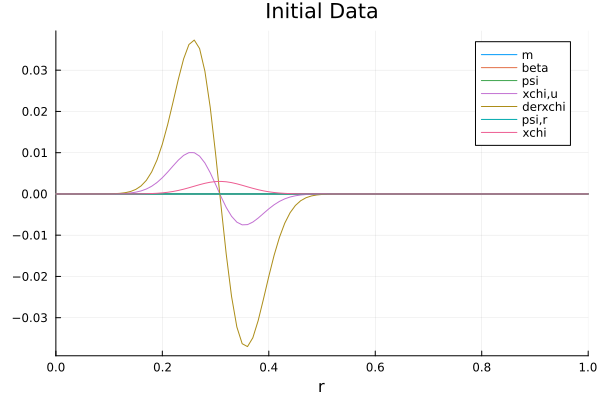

In [304]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi,u" "derxchi" "psi,r" "xchi"],xlim=[0,1])

In [305]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

In [306]:
state_array[:,7]

107-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 3.820067368172024e-12
 2.267497784034911e-11
 1.0379173746824802e-10
 4.0793686287347936e-10
 1.4437821250684556e-9
 4.7095073636007375e-9
 1.4338056307388401e-8
 4.1051032561843914e-8
 1.1106882370775496e-7
 ⋮
 7.831210173132591e-37
 6.174899795609995e-38
 4.673631078217995e-39
 3.3954980234669385e-40
 2.3679804203968673e-41
 1.5851826135960953e-42
 1.018610217825969e-43
 6.282973506826574e-45
 0.0
 0.0
 0.0
 0.0

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [307]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxchi", "derxchi", "derpsi", "xchi"]


print_muninn(files, 0, state_array[:,1:7],res,"w", state_array[:,8])

In [308]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [309]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0406081012141617


In [310]:
using Base.Threads
Threads.nthreads()

4

In [311]:
dt=0.001/2^(m-1)*2

0.002

 ## Time evolution

fixed grid

In [312]:
finaltime=2.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.002, t=0.20000000000000015 speed is 0.49005000000000004, dx/dt=5.0


iteration 200 dt is 0.002, t=0.4000000000000003 speed is 0.49005000000000004, dx/dt=5.0


iteration 300 dt is 0.002, t=0.6000000000000004 speed is 0.49005000000000004, dx/dt=5.0


iteration 400 dt is 0.002, t=0.8000000000000006 speed is 0.49005000000000004, dx/dt=5.0


iteration 500 dt is 0.002, t=1.0000000000000007 speed is 0.49005000000000004, dx/dt=5.0


iteration 600 dt is 0.002, t=1.2000000000000008 speed is 0.49005000000000004, dx/dt=5.0


iteration 700 dt is 0.002, t=1.400000000000001 speed is 0.49005000000000004, dx/dt=5.0


iteration 800 dt is 0.002, t=1.6000000000000012 speed is 0.49005000000000004, dx/dt=5.0


iteration 900 dt is 0.002, t=1.8000000000000014 speed is 0.49005000000000004, dx/dt=5.0


iteration 1000 dt is 0.002, t=2.0000000000000013 speed is 0.49005000000000004, dx/dt=5.0
